In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects
from scipy.spatial import ConvexHull
from matplotlib.patches import Arc
%matplotlib inline

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import json
from webdriver_manager.chrome import ChromeDriverManager
from pandas.io.json import json_normalize
import pandas as pd

In [6]:
driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get('https://www.whoscored.com/Matches/1485208/Live/England-Premier-League-2020-2021-Liverpool-Arsenal')
data = driver.execute_script("return matchCentreData;")

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)
       
driver.close()

[WDM] - Current google-chrome version is 85.0.4183
[WDM] - Get LATEST driver version for 85.0.4183
[WDM] - Get LATEST driver version for 85.0.4183
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/85.0.4183.87/chromedriver_mac64.zip


[WDM] - Driver has been saved in cache [/Users/ollinj01/.wdm/drivers/chromedriver/mac64/85.0.4183.87]


In [9]:
home_team, away_team = data["home"]["name"], data["away"]["name"]
with open(f"{home_team}_{away_team}.json", "w") as f: ## save as Arsenal_Liverpool.json in present directory
    json.dump(data, f, indent=4)

In [33]:
with open('Liverpool_Arsenal.json') as json_file:
    data = json.load(json_file)

event = []
minute = []
second = []
player = []
team = []
outcome = []
x = []
y = []
endX = []
endY = []
goal = []
passtype = []


for each in data['events']:
    event.append(each['type']['displayName'])
    try:
        minute.append(each['minute'])
    except:
        minute.append('')
    try:
        second.append(each['second'])
    except:
        second.append('')
    try:
        player.append(each['playerId'])
    except:
        player.append('')
    try:
        team.append(each['teamId'])
    except:
        team.append('')
    try:
        endX.append(each['endX'])
        endY.append(each['endY'])
    except:
        endX.append('')
        endY.append('')
    outcome.append(each['outcomeType']['displayName'])
    x.append(each['x'])
    y.append(each['y'])

    for key, value in each.items():
        passType = 'OpenPlay'
        if key == 'qualifiers':
            for item in value:
                if item['type']['displayName'] == 'IntentionalGoalAssist':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'BigChanceCreated':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'Assisted':
                    passType = item['type']['displayName']
            passtype.append(passType)
                
events = pd.DataFrame({'Event':event, 'Minute':minute, 'Second':second, 'Player':player, 'Team':team, 'Outcome':outcome, 'x':x, 'y':y,
                      'endX':endX, 'endY':endY, 'passtype':passtype})

In [11]:
events

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
0,Start,0,0,,13,Successful,0.0,0.0,,,OpenPlay
1,Start,0,0,,26,Successful,0.0,0.0,,,OpenPlay
2,Pass,0,1,73078,13,Successful,50.0,50.0,29,51,OpenPlay
3,Pass,0,4,27586,13,Successful,29.3,50.9,70.7,83.5,OpenPlay
4,Aerial,0,7,44120,13,Successful,71.5,81.8,,,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1724,End,93,3,,13,Successful,0.0,0.0,,,OpenPlay
1725,End,0,0,,26,Successful,0.0,0.0,,,OpenPlay
1726,End,0,0,,13,Successful,0.0,0.0,,,OpenPlay
1727,FormationSet,0,0,,26,Successful,0.0,0.0,,,OpenPlay


In [16]:
mask = ((events['Team']==13) & (events['Event'] == 'Tackle')) | ((events['Team']==13) & (events['Event'] == 'Challenge')) | ((events['Team']==13) & (events['Event'] == 'Interception')) | ((events['Team']==13) & (events['Event'] == 'BlockedPass')) | ((events['Team']==13) & (events['Event'] == 'BallRecovery')) | ((events['Team']==13) & (events['Event'] == 'Foul'))
ars = events.loc[mask]
ars

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
28,Foul,0,56,125211,13,Successful,39.7,10.0,,,OpenPlay
41,BallRecovery,1,42,27586,13,Successful,19.0,62.4,,,OpenPlay
49,Foul,2,8,297403,13,Successful,16.3,92.2,,,OpenPlay
57,BallRecovery,3,15,89401,13,Successful,47.7,74.0,,,OpenPlay
93,Interception,4,46,125209,13,Successful,11.6,18.6,,,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1513,BallRecovery,80,14,144890,13,Successful,29.4,17.0,,,OpenPlay
1533,BlockedPass,81,2,144890,13,Successful,52.1,49.4,,,OpenPlay
1563,BallRecovery,83,22,27586,13,Successful,10.7,86.5,,,OpenPlay
1703,Foul,91,35,345845,13,Unsuccessful,92.5,84.4,,,OpenPlay


In [41]:
mask = ((events['Team']==26) & (events['Event'] == 'Tackle')) | ((events['Team']==26) & (events['Event'] == 'Challenge')) | ((events['Team']==26) & (events['Event'] == 'Interception')) | ((events['Team']==26) & (events['Event'] == 'BlockedPass')) | ((events['Team']==26) & (events['Event'] == 'BallRecovery')) | ((events['Team']==26) & (events['Event'] == 'Foul'))
liv = events.loc[mask]
liv

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
16,Interception,0,24,115916,26,Successful,52.2,28.6,,,OpenPlay
29,Foul,0,56,109915,26,Unsuccessful,60.3,90.0,,,OpenPlay
50,Foul,2,8,109915,26,Unsuccessful,83.7,7.8,,,OpenPlay
55,BallRecovery,3,12,243510,26,Successful,44.5,25.0,,,OpenPlay
62,BallRecovery,3,22,318871,26,Successful,43.0,5.8,,,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1611,BallRecovery,85,50,115916,26,Successful,42.9,64.6,,,OpenPlay
1644,BallRecovery,88,37,4511,26,Successful,34.4,46.4,,,OpenPlay
1695,BallRecovery,91,13,136451,26,Successful,40.9,7.6,,,OpenPlay
1702,Foul,91,35,95408,26,Successful,7.5,15.6,,,OpenPlay


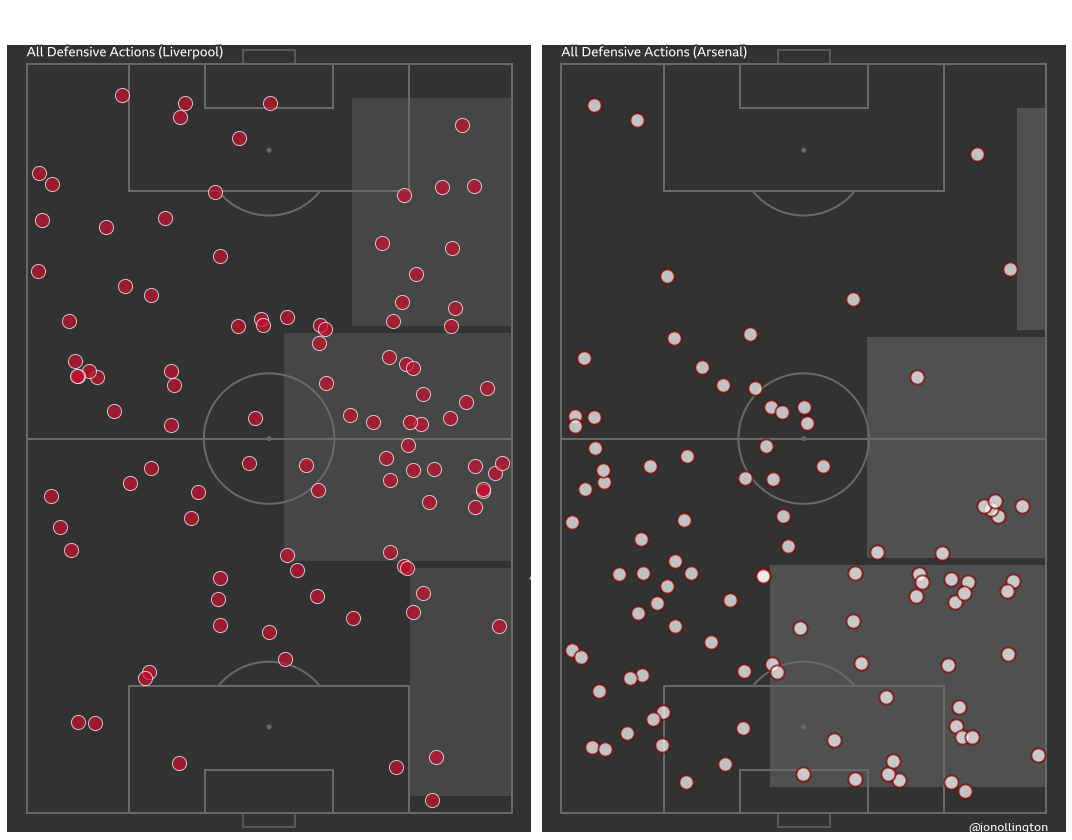

In [85]:
csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

background = "#313332"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"

pitch = Pitch(pitch_type='opta', figsize=(15, 15), layout=(1, 2), line_zorder=2, goal_type='box',
              pitch_color=background, line_color=line, orientation='vertical')

fig, ax = pitch.draw()
ax[0].scatter(liv['y'],liv['x'],color='#C8102E', s=200, zorder=12,alpha=0.7, ec='#FFFFFF',lw=1)

x = liv['x']
ax[0].hist(x, bins = 3,rwidth=0.97, color='white',alpha=0.1,orientation="horizontal")

ax[1].scatter(ars['y'],ars['x'],color='#FFFFFF', s=200, zorder=12,alpha=0.7, ec='#800000',lw=2)

x1 = ars['x']
ax[1].hist(x1, bins = 3,rwidth=0.97, color='white',alpha=0.15, orientation="horizontal")

fig.text(0.027, 0.88, "Houssem Aouar",fontsize=30, fontfamily=body_font, color='white', weight='bold',zorder=2, **csfont)
fig.text(0.305, 0.88, " English Premier League 2020/21 | Mon 28 Sep 2020",fontsize=18, fontfamily=body_font, color=text_color,zorder=2, **csfont)
n1 = fig.text(0.028, 0.854, "All Defensive Actions (Liverpool)",fontsize=13, fontfamily=body_font, color='white',zorder=2, **csfont)
n1.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
n2 = fig.text(0.523, 0.854, "All Defensive Actions (Arsenal)",fontsize=13, fontfamily=body_font, color='white',zorder=2, **csfont)
n2.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
info_string = '@jonollington'
fig.text(0.9, 0.135, info_string, color='#ffffff', ha='left', va='bottom', fontsize=12, **csfont)

#arrow
arrow="Simple,tail_width=0.4,head_width=1.3,head_length=0.9"
ax2 = fig.add_axes([0.48,0.17,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.7))


plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("def actions",bbox_inches="tight",dpi=200);